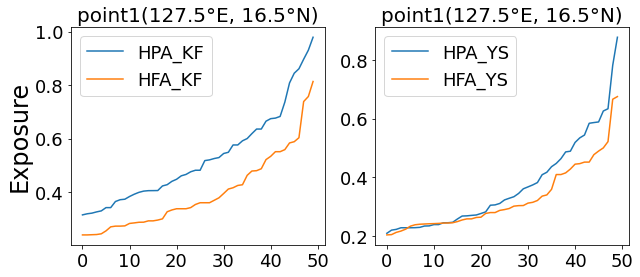

In [58]:
import pygrib
import os
import csv
import numpy as np
import math
from csv import reader
import matplotlib.pyplot as plt

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

IDX = [79*67 + 13]
MODEL = ['HPA_KF', 'HFA_KF_c0', 'HPA_YS', 'HFA_YS_c0']

fig = plt.figure(figsize=(10, 4))
for model_num in range(2):
    STM_LIST = []
    for time in range(2):
        model = MODEL[model_num * 2 + time]
        STM_DATA = []
        with open('../Ex_csv/' + model + '_max.csv', 'r') as csv_file:
            csv_reader = reader(csv_file)
            STM = list(csv_reader)
        with open('../Ex_csv/' + model + '_ex_idx.csv', 'r') as csv_file:
            csv_reader = reader(csv_file)
            INDEX = list(csv_reader)
        # STMを探索し, Exposureを算出
        for j in range(len(INDEX[0])):
            mx = 0
            for k in range(79 * 79):
                mx = max(mx, float(STM[k][j]))
            STM_DATA.append(mx)
            for k in range(79 * 79):
                STM[k][j] = float(STM[k][j]) / mx
        
        STM_LIST.append(STM)

        with open('../Ex_csv/' + model + '_ex_ratio.csv', 'w') as file:
            writer = csv.writer(file, lineterminator='\n')
            writer.writerows(STM)

        with open('../Ex_csv/' + model + '_STM.csv', 'w') as file:
            writer = csv.writer(file, lineterminator='\n')
            writer.writerow(STM_DATA)

    # ここまでで現在/将来のExposureが算出されている
        
    # Exposureの上位30を可視化
    for j in range(len(IDX)):
        ax = fig.add_subplot(1, 2, model_num + j * 2 + 1)
        idx = IDX[j]
        sort_ex_p = sorted(STM_LIST[0][idx])[-50:]
        sort_ex_f = sorted(STM_LIST[1][idx])[-50:]
        if model_num == 0:
            ax.plot(np.arange(50), sort_ex_p, label='HPA_KF')
            ax.plot(np.arange(50), sort_ex_f, label='HFA_KF')
            ax.set_ylabel('Exposure', fontsize=24)
        else:
            ax.plot(np.arange(50), sort_ex_p, label='HPA_YS')
            ax.plot(np.arange(50), sort_ex_f, label='HFA_YS')
        ax.axes.tick_params(labelsize=18)
        ax.set_xticks([0, 10, 20, 30, 40, 50])
        ax.set_title('point' + str(j + 1) + "(127.5°E, 16.5°N)", fontsize=20)
        plt.legend(fontsize=18)
plt.savefig('../img/changes_of_exposure.png')
plt.show()